In [8]:
# 设置cell宽度
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',500)
set_option('display.max_columns',500)
set_option('display.max_colwidth',1000)
# set_option('precision', 4) # 设置为4位精度
set_option('display.float_format',lambda x : '%.4f' % x) # jupyter 取消科学计数法

In [9]:
from numpy import log, sqrt, exp, insert, double, isclose, vstack, hstack
from numpy.random import normal
from pandas import DataFrame, read_excel
from pyflow.model import pyvc
import talib

from matplotlib import pyplot
import plotly.graph_objects as go

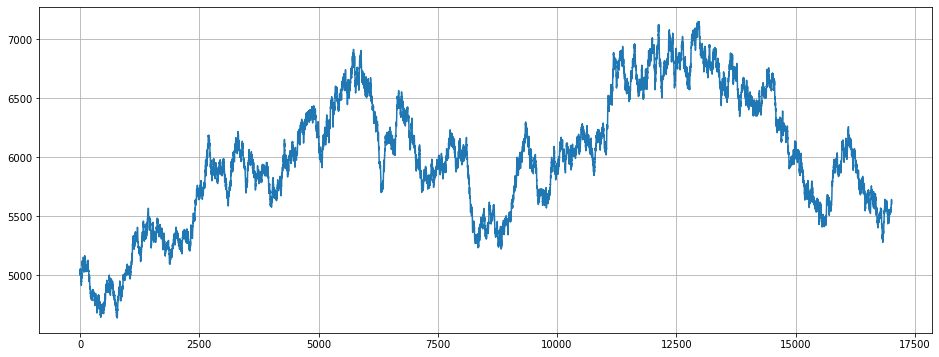

In [10]:
# params
mu = 1e-8
sigma = 0.2
diff_time = 1 / 244. / (4 * 4)

spot = 5000
size = 1001 * (4 * 4 + 1) - 1
lns = (mu - sigma*sigma/2) * diff_time + sigma* normal(0,1, size=size)*sqrt(diff_time)
lns = insert(lns, 0, log(spot))
lns = lns.cumsum()

pyplot.figure(figsize=(16, 6))
pyplot.plot(exp(lns))
pyplot.grid()

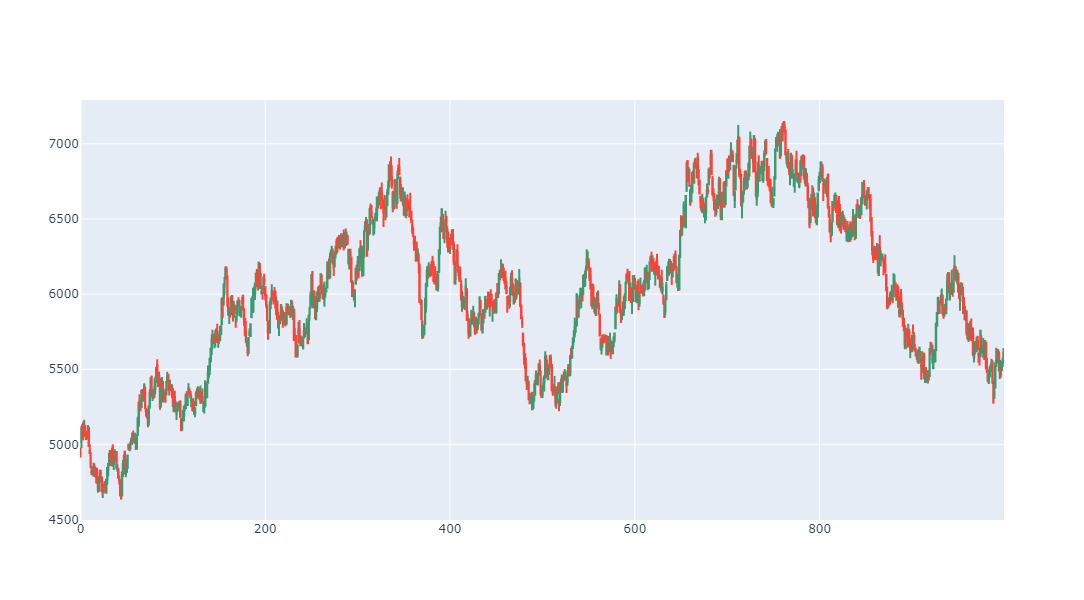

In [11]:
lns = lns.reshape(-1, 17)
spot_path = exp(lns)
open_s = spot_path[1:, 0]
high = spot_path.max(axis=1)[1:]
low = spot_path.min(axis=1)[1:]
close = spot_path[1:, -1]
pre_close = spot_path[:-1, -1]
# plot
fig = go.Figure(data=[go.Candlestick(
    x=list(range(close.shape[0])),
                open=open_s,
                high=high,
                low=low,
                close=close)])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(
    autosize=False,
    width=1200,
    height=600)
fig.show()

In [12]:
open_s = spot_path[1:, 0]
high = spot_path.max(axis=1)[1:]
low = spot_path.min(axis=1)[1:]
close = spot_path[1:, -1]
pre_close = spot_path[:-1, -1]

data = vstack([pre_close, open_s, high, low, close]).T
adj_open_s = data[:, 0]
adj_close = data[:, -1]
adj_high = data.max(axis=1)
adj_low = data.min(axis=1)

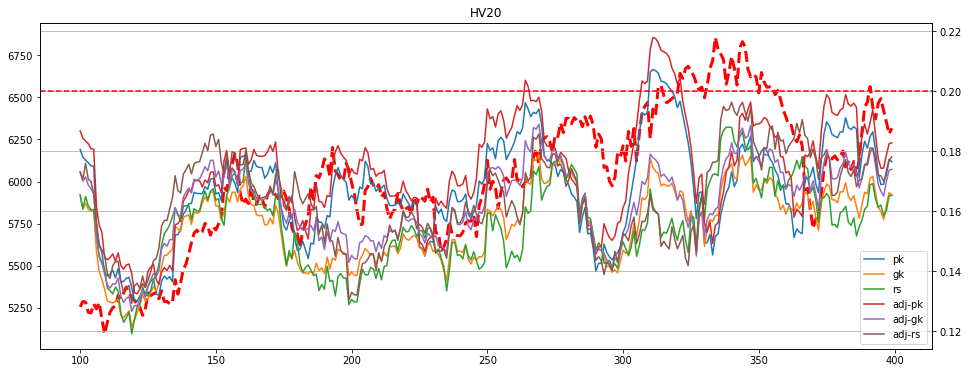

In [13]:
shift_num = 20
hv_cc = pyvc.calc_hv_cc(close.astype(double), shift_num)
hv_ema = pyvc.calc_hv_cc_ema(close.astype(double), shift_num)
hv_pk = pyvc.calc_hv_pk(high.astype(double), low.astype(double), shift_num)
hv_gk = pyvc.calc_hv_gk(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), shift_num)
hv_rs = pyvc.calc_hv_rs(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), shift_num)
hv_gkyz = pyvc.calc_hv_gkyz(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), pre_close.astype(double), shift_num)
hv_yz = pyvc.calc_hv_yz(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), pre_close.astype(double), shift_num)

adj_hv_pk = pyvc.calc_hv_pk(adj_high.astype(double), adj_low.astype(double), shift_num)
adj_hv_gk = pyvc.calc_hv_gk(adj_open_s.astype(double), adj_high.astype(double), adj_low.astype(double), adj_close.astype(double), shift_num)
adj_hv_rs = pyvc.calc_hv_rs(adj_open_s.astype(double), adj_high.astype(double), adj_low.astype(double), adj_close.astype(double), shift_num)

# hv_df = DataFrame([hv_cc, hv_ema, hv_pk, hv_gk, hv_rs, hv_gkyz, hv_yz, adj_hv_pk, adj_hv_gk, adj_hv_rs]).T
# hv_df.columns = ["cc", "ema", "pk", "gk", "rs", "gkyz", "yz", "adj-pk", "adj-gk", "adj-rs"]

hv_df = DataFrame([hv_pk, hv_gk, hv_rs,adj_hv_pk, adj_hv_gk, adj_hv_rs]).T
hv_df.columns = ["pk", "gk", "rs", "adj-pk", "adj-gk", "adj-rs"]

fig = pyplot.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
pyplot.plot(list(range(100, 400)), close[100:400], linestyle="--", linewidth=3, color="r")

ax2 = ax.twinx()
hv_df.iloc[100:400].plot(grid=False, ax=ax2)
pyplot.axhline(0.2, color="r", linestyle="--")
pyplot.title("HV{}".format(shift_num))
pyplot.grid()
pyplot.show()

fig.savefig("hv20.png", dpi=600)

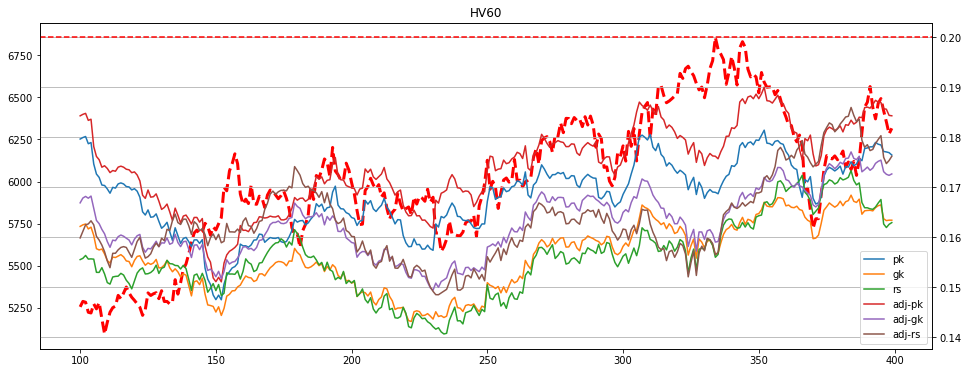

In [14]:
shift_num = 60
hv_cc = pyvc.calc_hv_cc(close.astype(double), shift_num)
hv_ema = pyvc.calc_hv_cc_ema(close.astype(double), shift_num)
hv_pk = pyvc.calc_hv_pk(high.astype(double), low.astype(double), shift_num)
hv_gk = pyvc.calc_hv_gk(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), shift_num)
hv_rs = pyvc.calc_hv_rs(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), shift_num)
hv_gkyz = pyvc.calc_hv_gkyz(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), pre_close.astype(double), shift_num)
hv_yz = pyvc.calc_hv_yz(open_s.astype(double), high.astype(double), low.astype(double), close.astype(double), pre_close.astype(double), shift_num)

adj_hv_pk = pyvc.calc_hv_pk(adj_high.astype(double), adj_low.astype(double), shift_num)
adj_hv_gk = pyvc.calc_hv_gk(adj_open_s.astype(double), adj_high.astype(double), adj_low.astype(double), adj_close.astype(double), shift_num)
adj_hv_rs = pyvc.calc_hv_rs(adj_open_s.astype(double), adj_high.astype(double), adj_low.astype(double), adj_close.astype(double), shift_num)

# hv_df = DataFrame([hv_cc, hv_ema, hv_pk, hv_gk, hv_rs, hv_gkyz, hv_yz, adj_hv_pk, adj_hv_gk, adj_hv_rs]).T
# hv_df.columns = ["cc", "ema", "pk", "gk", "rs", "gkyz", "yz", "adj-pk", "adj-gk", "adj-rs"]

hv_df = DataFrame([hv_pk, hv_gk, hv_rs,adj_hv_pk, adj_hv_gk, adj_hv_rs]).T
hv_df.columns = ["pk", "gk", "rs", "adj-pk", "adj-gk", "adj-rs"]

fig = pyplot.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
pyplot.plot(list(range(100, 400)), close[100:400], linestyle="--", linewidth=3, color="r")

ax2 = ax.twinx()
hv_df.iloc[100:400].plot(grid=False, ax=ax2)
pyplot.axhline(0.2, color="r", linestyle="--")
pyplot.title("HV{}".format(shift_num))
pyplot.grid()
pyplot.show()

fig.savefig("hv60.png", dpi=600)